In [1]:
pip install igraph

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# use this code in the anaconda prompt, not in jupyter notebook
#conda install -c conda-forge python-annoy
#pip install bbknn

^C


In [2]:
pip install gseapy

     |████████████████████████████████| 1.5 MB 1.7 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 964 kB 3.4 MB/s eta 0:00:01
  Using cached grequests-0.6.0-py3-none-any.whl (5.2 kB)
     |████████████████████████████████| 47 kB 5.2 MB/s eta 0:00:01
  Using cached easydev-0.12.0-py3-none-any.whl
     |████████████████████████████████| 4.6 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 144 kB 4.9 MB/s eta 0:00:01
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached gevent-21.12.0-cp38-cp38-macosx_10_14_x86_64.whl (1.9 MB)
  Using cached zope.interface-5.4.0-cp38-cp38-macosx_10_14_x86_64.whl (208 kB)
     |████████████████████████████████| 93 kB 2.1 MB/s eta 0:00:011
  Using cached zope.event-4.5.0-py2.py3-none-any.whl (6.8 kB)
  Using cached url_normalize-1.4.3-py2.py3-none-any.whl (6.8 kB)
  ERROR: Command errored 

Note: you may need to restart the kernel to use updated packages.


In [1]:
import bbknn

In [2]:
import pandas as pd
import scanpy as sc
import numpy as np
from numpy import linalg as la
from scipy.sparse import issparse
import loompy
import anndata
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.4 (python 3.9.12) on 2023-04-21 11:16.


In [3]:
import seaborn as sns
import matplotlib as mpl
import plotly.graph_objects as go
from pySankey.sankey import sankey
import holoviews as hv

In [4]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80,dpi_save=300, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.3 scipy==1.8.1 pandas==1.4.2 scikit-learn==1.2.2 statsmodels==0.13.2 python-igraph==0.10.4 louvain==0.7.1 pynndescent==0.5.6


In [5]:
import os
os.chdir('F:/Ko/67ESCC_PCN_integration_07-19-22/immune_cell_T4_M4')

In [6]:
import scanpy.external as sce

In [7]:
adata = sc.read('Immune_Group_ABC_after_celltype_clustering.h5ad')

In [8]:
adata.obs

n_genes  n_genes_by_counts  total_counts  \
AAACCTGAGTAGCCGA-1-0-0    3934.0               3879   1452.073242   
AAACCTGCAAGAGGCT-1-0-0     674.0                669    882.995728   
AAACCTGCAGTATCTG-1-0-0    1014.0               1003    956.411804   
AAACCTGCATGCCTTC-1-0-0    2607.0               2556   1262.646240   
AAACCTGGTGCCTGGT-1-0-0     896.0                885   1091.559448   
...                          ...                ...           ...   
TTTGGTTCAAGCCATT-1-24-2   4456.0               4328   1867.209229   
TTTGGTTGTCACCCAG-1-24-2    689.0                642    487.017822   
TTTGTCAAGCGCTTAT-1-24-2    248.0                235    523.794067   
TTTGTCAGTCCTCTTG-1-24-2   2711.0               2644   1972.602417   
TTTGTCAGTCTCTTTA-1-24-2   1890.0               1858   1673.672119   

                         total_counts_mt  pct_counts_mt tissue patient leiden  \
AAACCTGAGTAGCCGA-1-0-0         18.802568       1.294877  tumor    P686      6   
AAACCTGCAAGAGGCT-1-0-0         11.229170       1.271713  tumor    P686      6   
AAACCTGCAGTATCTG-1-0-0         18.788149       1.964441  tumor    P686      6   
AAACCTGCATGCCTTC-1-0-0         23.060396       1.826355  tumor    P686     14   
AAACCTGGTGCCTGGT-1-0-0         17.238060       1.579214  tumor    P686      6   
...                                  ...            ...    ...     ...    ...   
TTTGGTTCAAGCCATT-1-24-2        29.546848       1.582407  tumor    P001      0   
TTTGGTTGTCACCCAG-1-24-2        17.679008       3.630054  tumor    P001      5   
TTTGTCAAGCGCTTAT-1-24-2         8.050291       1.536919  tumor    P001      5   
TTTGTCAGTCCTCTTG-1-24-2        24.433256       1.238631  tumor    P001     10   
TTTGTCAGTCTCTTTA-1-24-2         7.590561       0.453527  tumor    P001      4   

                        batch  total_counts_ribo  pct_counts_ribo  \
AAACCTGAGTAGCCGA-1-0-0      0         198.197769        13.649295   
AAACCTGCAAGAGGCT-1-0-0      0         213.666718        24.197933   
AAACCTGCAGTATCTG-1-0-0      0         221.148575        23.122736   
AAACCTGCATGCCTTC-1-0-0      0         161.333832        12.777437   
AAACCTGGTGCCTGGT-1-0-0      0         176.360626        16.156759   
...                       ...                ...              ...   
TTTGGTTCAAGCCATT-1-24-2     2         172.502136         9.238501   
TTTGGTTGTCACCCAG-1-24-2     2          59.435638        12.203997   
TTTGTCAAGCGCTTAT-1-24-2     2          57.140697        10.909000   
TTTGTCAGTCCTCTTG-1-24-2     2         120.637726         6.115664   
TTTGTCAGTCTCTTTA-1-24-2     2         163.753265         9.784071   

                         total_counts_hb  pct_counts_hb  percent_mt2  \
AAACCTGAGTAGCCGA-1-0-0          0.000000       0.000000     0.012949   
AAACCTGCAAGAGGCT-1-0-0          0.000000       0.000000     0.012717   
AAACCTGCAGTATCTG-1-0-0          0.000000       0.000000     0.019644   
AAACCTGCATGCCTTC-1-0-0          0.000000       0.000000     0.018264   
AAACCTGGTGCCTGGT-1-0-0          0.000000       0.000000     0.015792   
...                                  ...            ...          ...   
TTTGGTTCAAGCCATT-1-24-2         0.172559       0.009242     0.015824   
TTTGGTTGTCACCCAG-1-24-2         0.000000       0.000000     0.036301   
TTTGTCAAGCGCTTAT-1-24-2         0.000000       0.000000     0.015369   
TTTGTCAGTCCTCTTG-1-24-2         0.000000       0.000000     0.012386   
TTTGTCAGTCTCTTTA-1-24-2         0.000000       0.000000     0.004535   

                            n_counts celltype         crude   celltype_detail  \
AAACCTGAGTAGCCGA-1-0-0   1452.073242        6        T cell        CD8 T cell   
AAACCTGCAAGAGGCT-1-0-0    882.995728        6        T cell        CD8 T cell   
AAACCTGCAGTATCTG-1-0-0    956.411804        6        T cell        CD8 T cell   
AAACCTGCATGCCTTC-1-0-0   1262.646240       14  Myeloid cell     M1 Macrophage   
AAACCTGGTGCCTGGT-1-0-0   1091.559448        6        T cell        CD8 T cell   
...                              ...      .

In [9]:
adata.obs['crude']

AAACCTGAGTAGCCGA-1-0-0           T cell
AAACCTGCAAGAGGCT-1-0-0           T cell
AAACCTGCAGTATCTG-1-0-0           T cell
AAACCTGCATGCCTTC-1-0-0     Myeloid cell
AAACCTGGTGCCTGGT-1-0-0           T cell
                               ...     
TTTGGTTCAAGCCATT-1-24-2          T cell
TTTGGTTGTCACCCAG-1-24-2     Plasma cell
TTTGTCAAGCGCTTAT-1-24-2     Plasma cell
TTTGTCAGTCCTCTTG-1-24-2          T cell
TTTGTCAGTCTCTTTA-1-24-2          T cell
Name: crude, Length: 177304, dtype: category
Categories (6, object): ['B cell', 'EC', 'Mast cell', 'Myeloid cell', 'Plasma cell', 'T cell']

In [10]:
adata_T = adata[adata.obs['crude']=='T cell']

In [11]:
#sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
#adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
sc.tl.leiden(adata)
sc.tl.umap(adata)

regressing out ['total_counts', 'pct_counts_mt']
    finished (1:09:40)
computing PCA
    with n_comps=50
    finished (0:03:32)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:42)
running Leiden clustering
    finished: found 28 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:02:23)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:02:46)


    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_patient']`


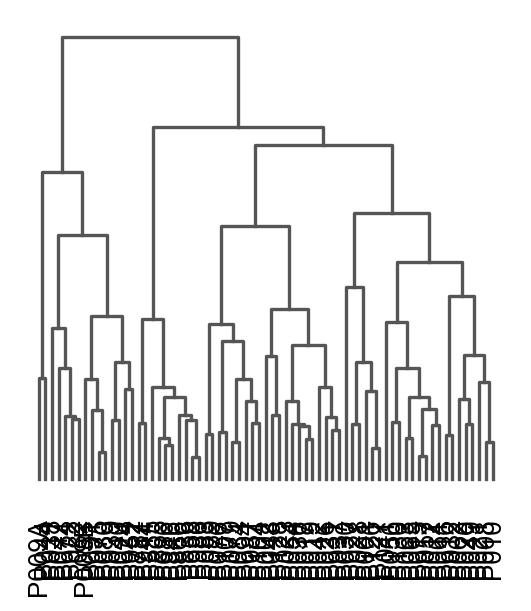

<AxesSubplot:>

In [12]:
# dendrogram after converting mouse gene to human gene
sc.tl.dendrogram(adata_T, 'patient')
sc.pl.dendrogram(adata_T, 'patient')

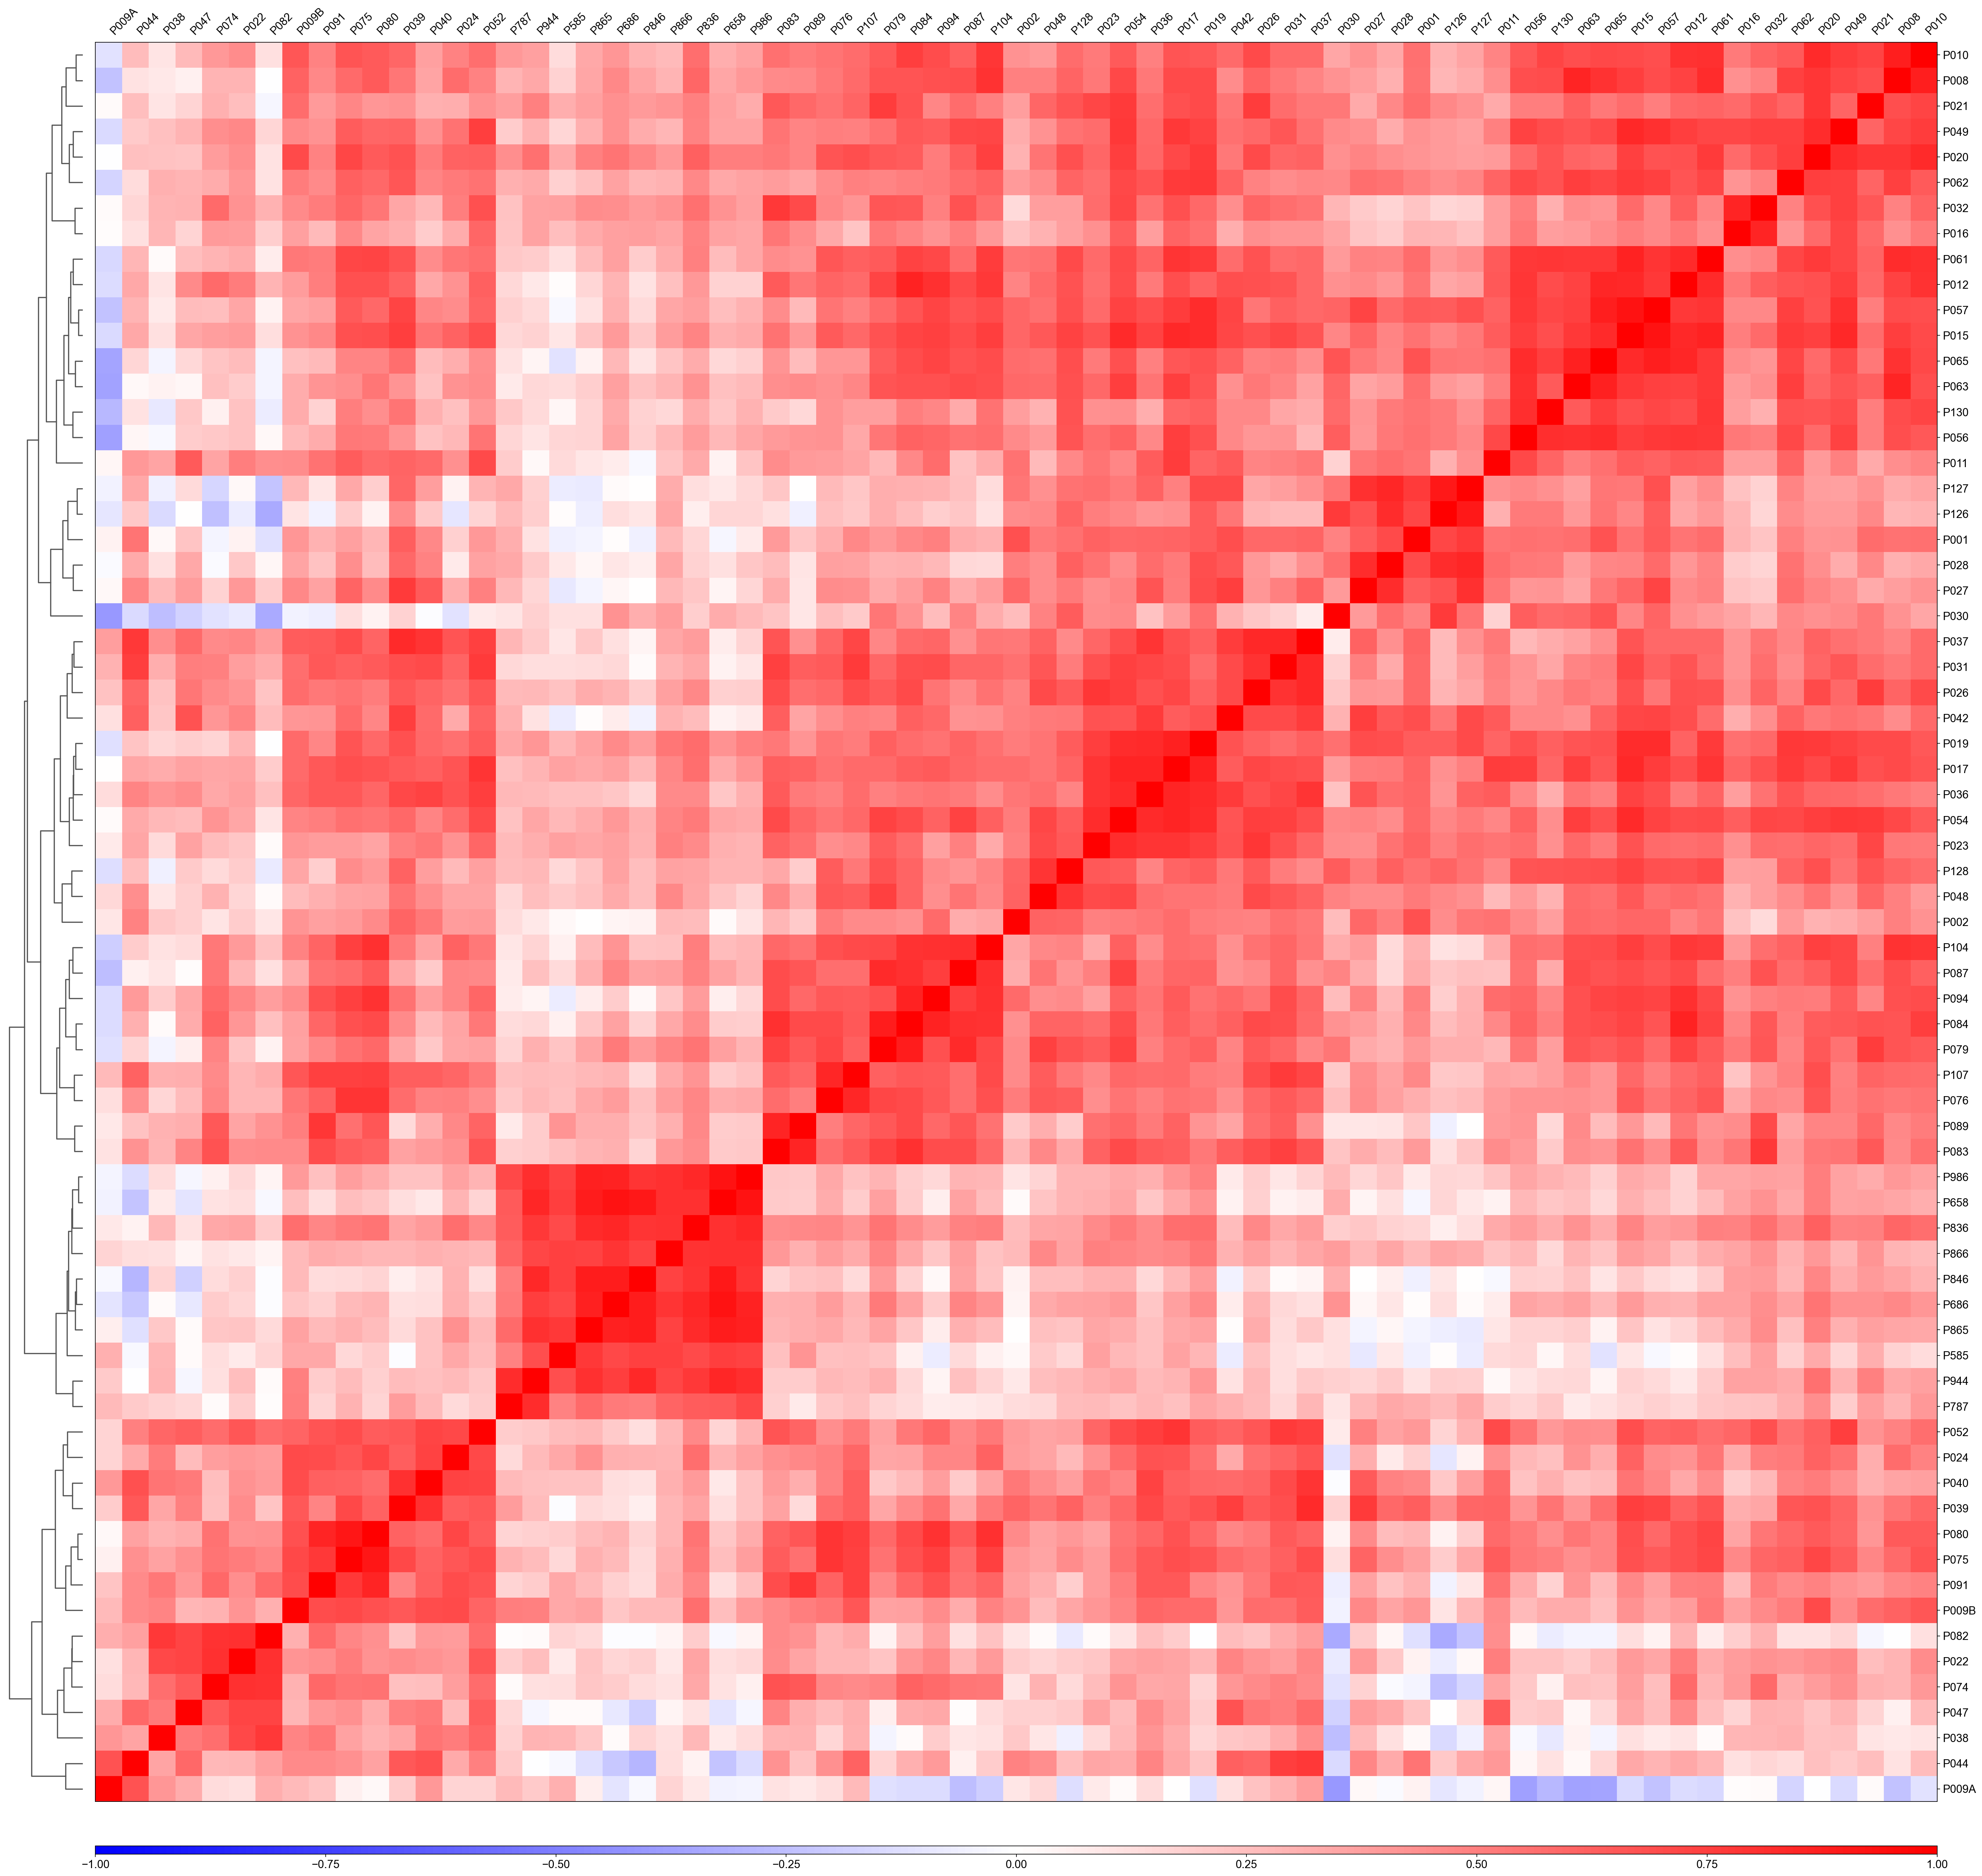

In [13]:
sc.pl.correlation_matrix(adata_T, groupby='patient')

In [14]:
adata_T

AnnData object with n_obs × n_vars = 114974 × 12499
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'patient', 'leiden', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'celltype', 'crude', 'celltype_detail', 'patient_cluster', 'dataset'
    var: 'gene_ids', 'mt', 'feature_types-10', 'feature_types-11', 'feature_types-12', 'feature_types-13', 'feature_types-14', 'feature_types-15', 'feature_types-16', 'feature_types-17', 'feature_types-18', 'feature_types-19', 'feature_types-20', 'feature_types-21', 'feature_types-3', 'feature_types-4', 'feature_types-5', 'feature_types-6', 'feature_types-7', 'feature_types-8', 'feature_types-9', 'feature_types-0', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'n_cells-1-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'n_cells

In [15]:
# previous one
#adata_T

In [16]:
#previous data (not sorted 1~11)
#sc.pl.dotplot(adata, ['CCR2'], groupby='patient', use_raw=False)

In [17]:
#############################################################
############ Harmony batch correction #######################
#############################################################

sce.pp.harmony_integrate(adata_T, 'batch')
'X_pca_harmony' in adata_T.obsm
True

2023-04-14 03:37:56,305 - harmonypy - INFO - Iteration 1 of 10
2023-04-14 03:39:21,328 - harmonypy - INFO - Iteration 2 of 10
2023-04-14 03:40:46,078 - harmonypy - INFO - Iteration 3 of 10
2023-04-14 03:42:11,199 - harmonypy - INFO - Converged after 3 iterations


True

In [18]:
adata_T.obsm['X_pca'] = adata_T.obsm['X_pca_harmony']
sc.pp.neighbors(adata_T)
sc.tl.pca(adata_T)
sc.tl.umap(adata_T)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:08)
computing PCA
    with n_comps=50
    finished (0:01:09)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:55)


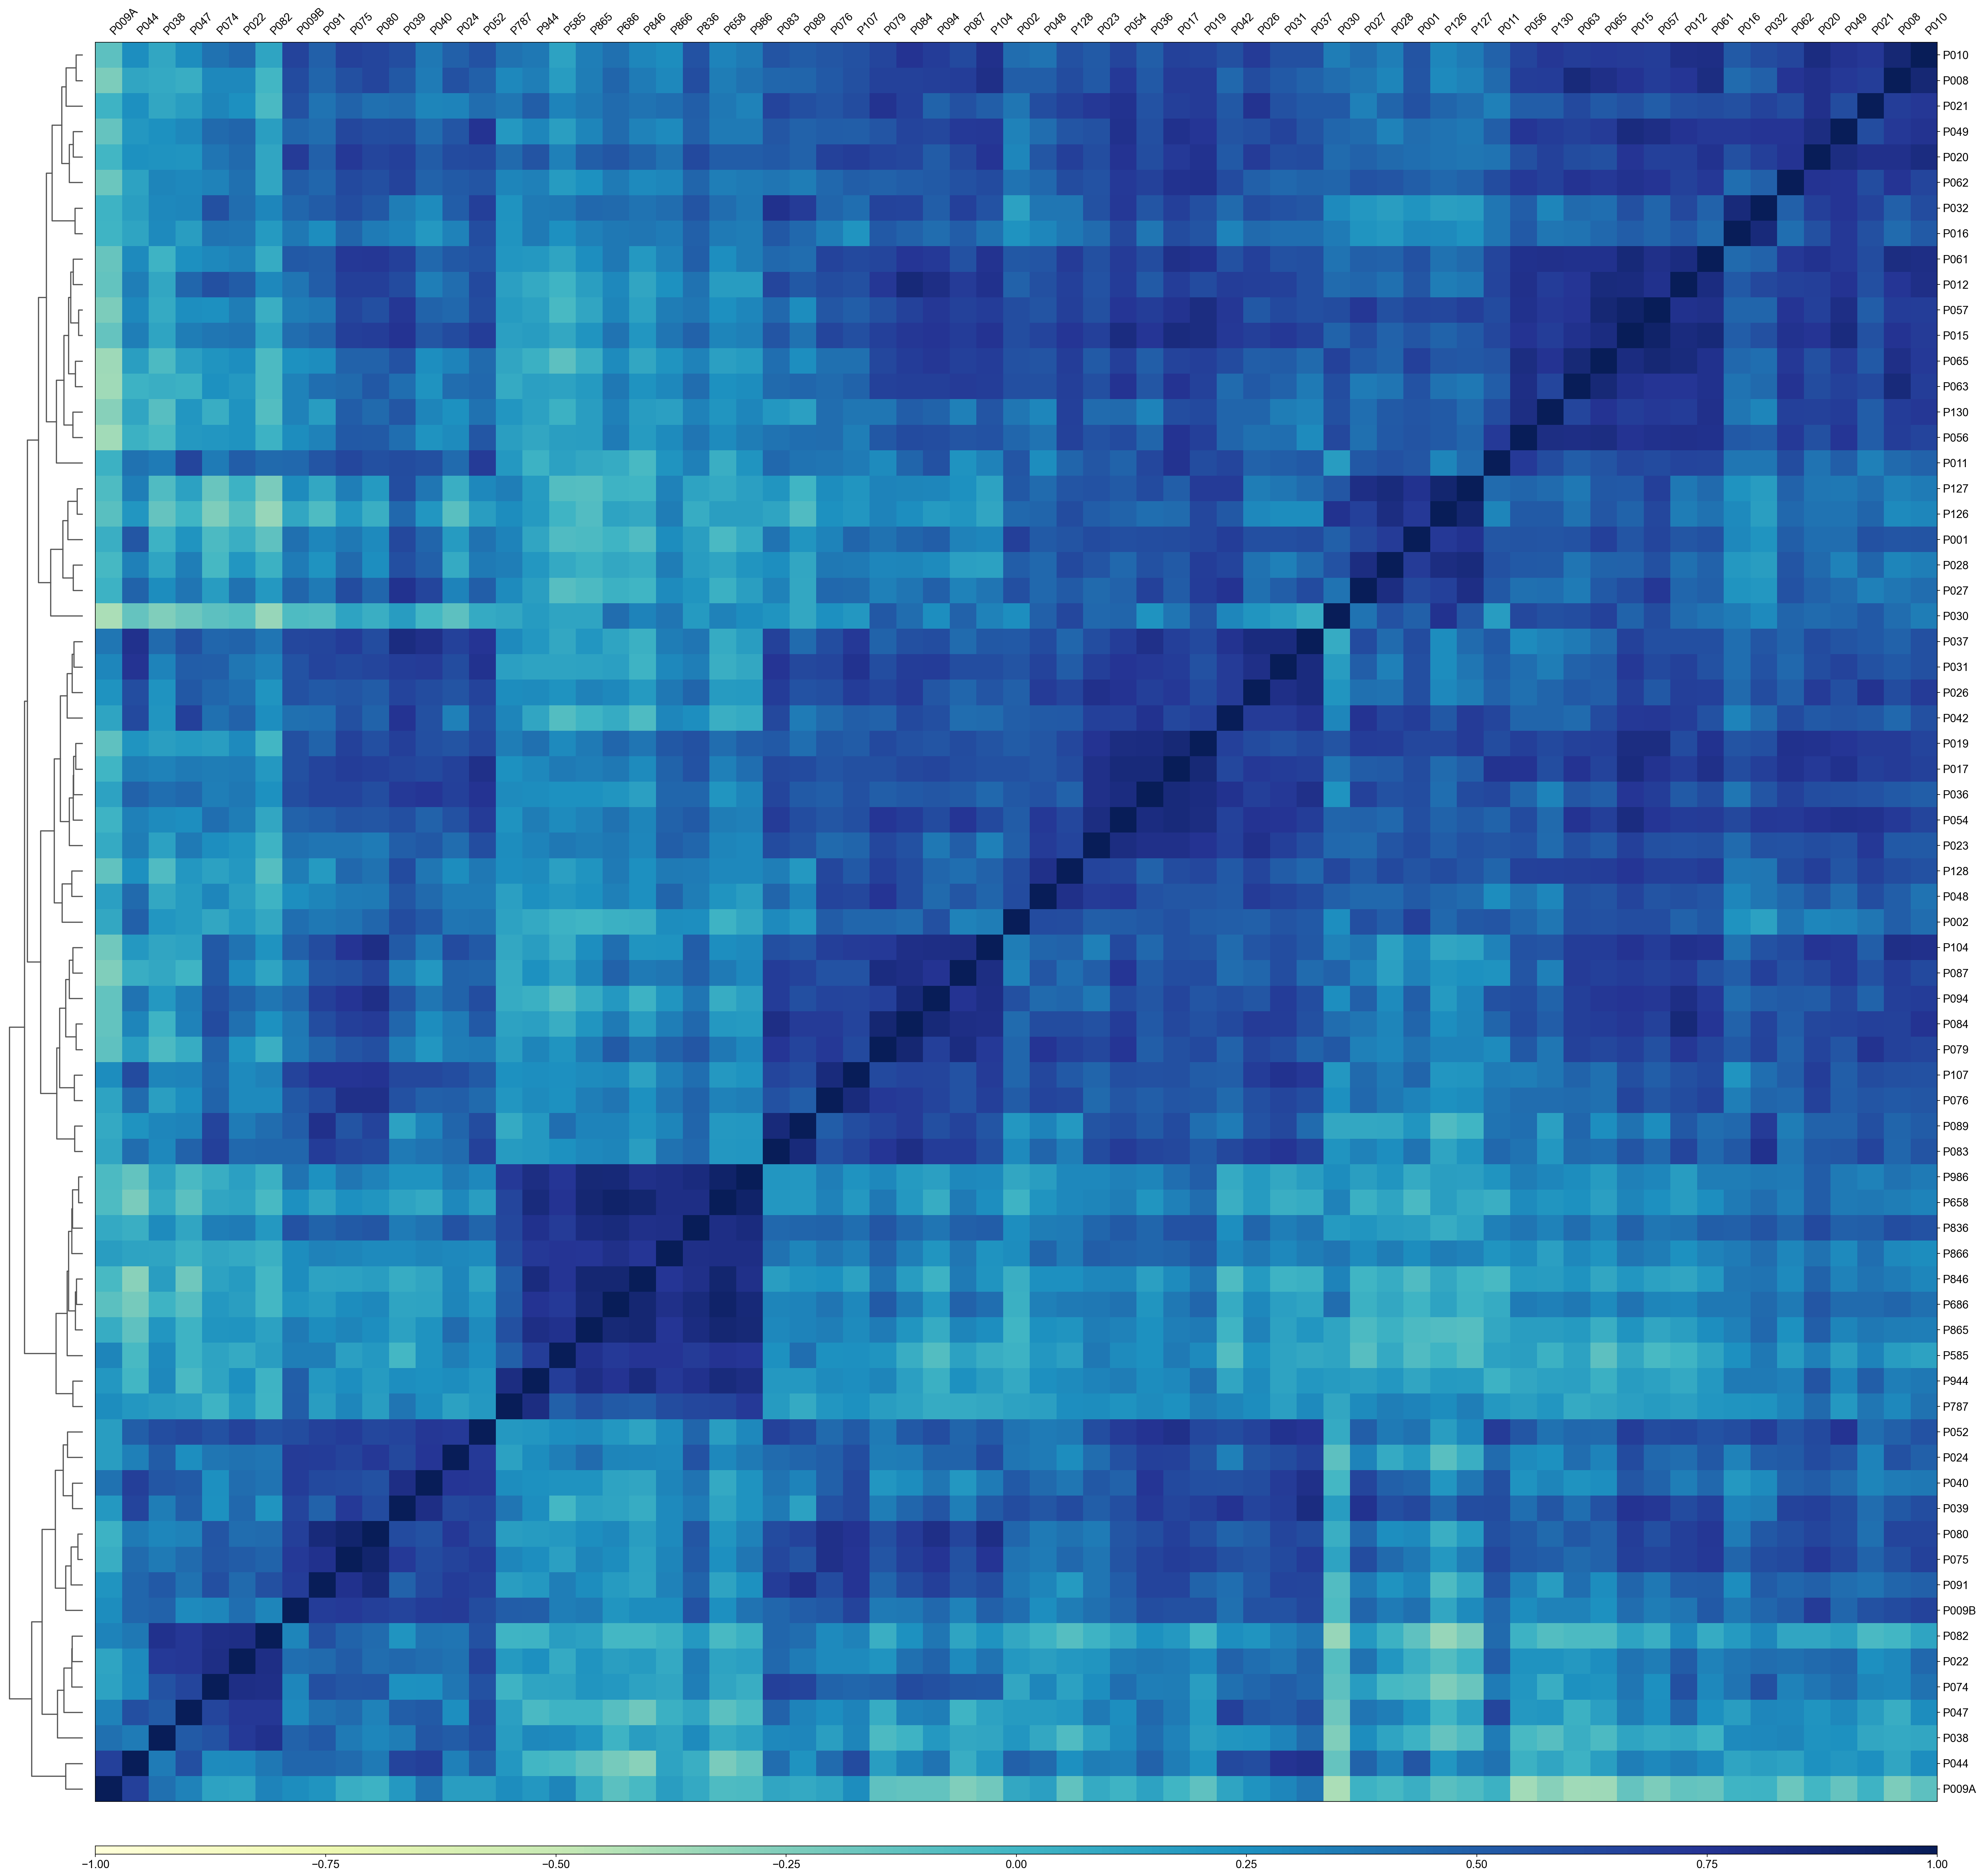

In [19]:
sc.pl.correlation_matrix(adata_T, groupby='patient',cmap='YlGnBu', save='_T_cell_GroupABC_correlation_matrix.pdf')

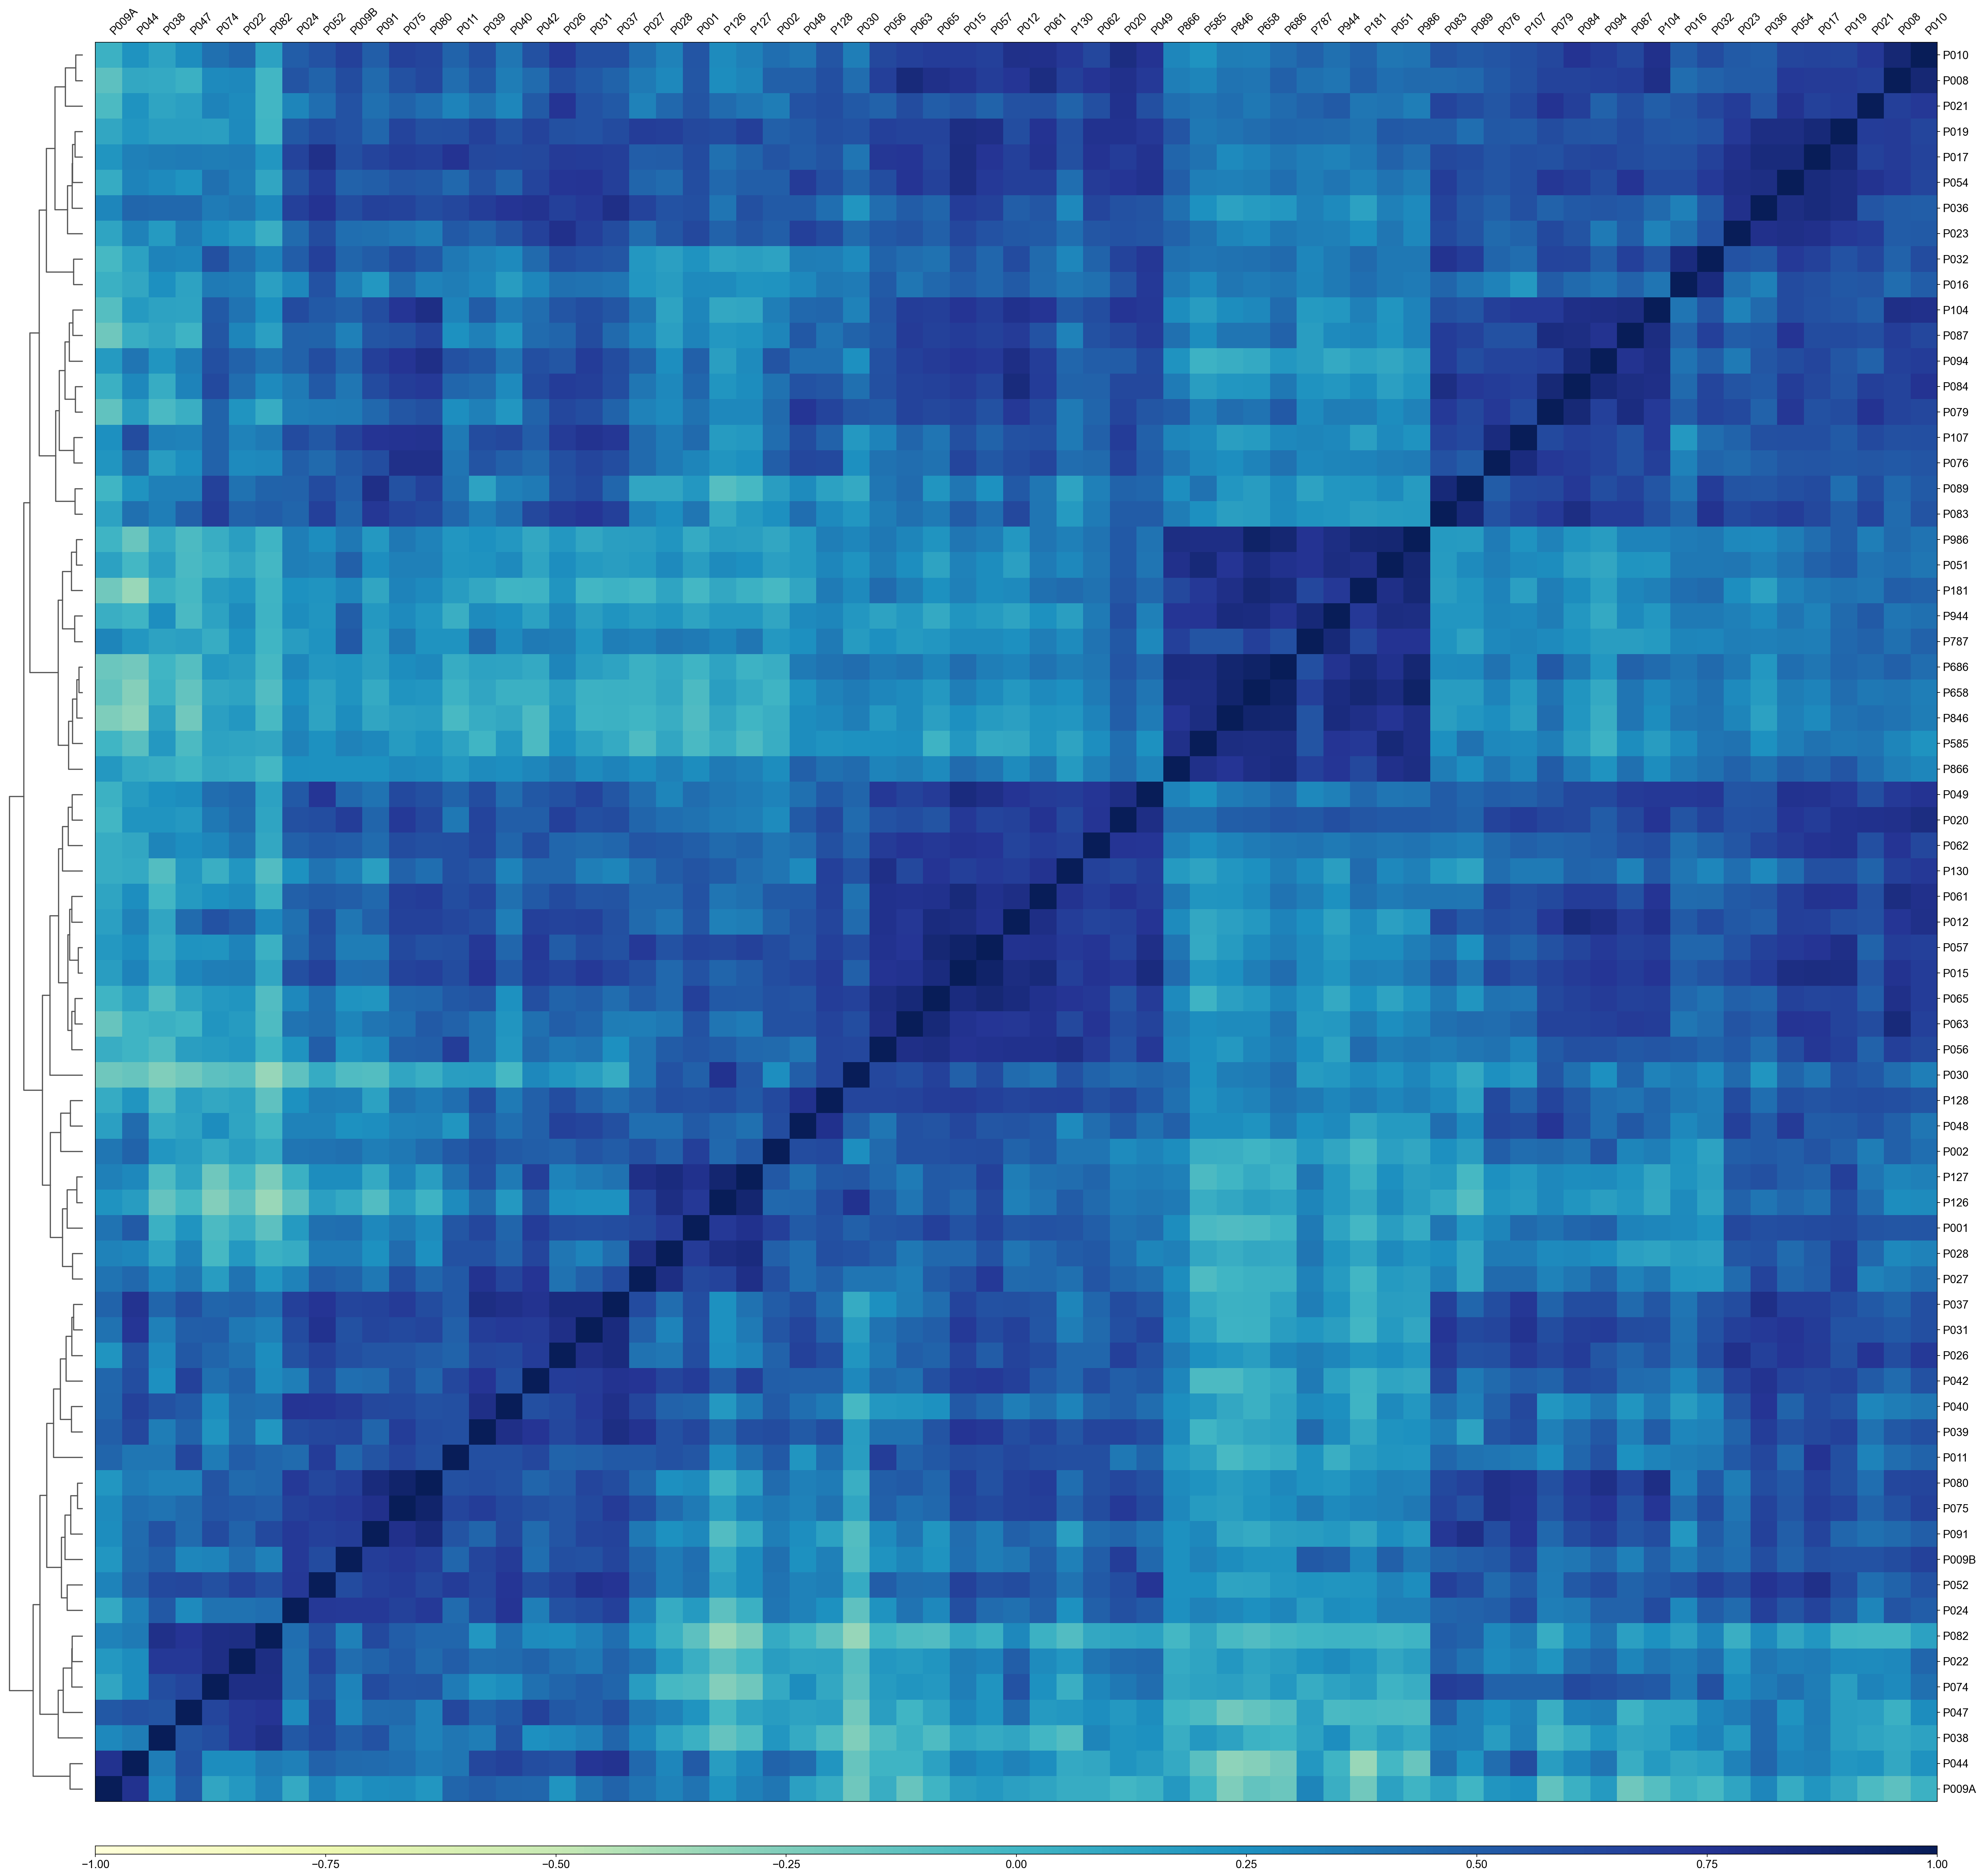

In [21]:
# previous one
#sc.pl.correlation_matrix(adata_T, groupby='patient',cmap='YlGnBu', save='_T_cell_GroupABC_correlation_matrix.pdf')

In [21]:
adata_T.obs['patient']

AAACCTGAGTAGCCGA-1-0-0     P686
AAACCTGCAAGAGGCT-1-0-0     P686
AAACCTGCAGTATCTG-1-0-0     P686
AAACCTGGTGCCTGGT-1-0-0     P686
AAACCTGGTGCGCTTG-1-0-0     P686
                           ... 
TTTGGTTAGCAAATCA-1-24-2    P001
TTTGGTTAGTGGTAAT-1-24-2    P001
TTTGGTTCAAGCCATT-1-24-2    P001
TTTGTCAGTCCTCTTG-1-24-2    P001
TTTGTCAGTCTCTTTA-1-24-2    P001
Name: patient, Length: 114974, dtype: category
Categories (69, object): ['P001', 'P002', 'P008', 'P009A', ..., 'P865', 'P866', 'P944', 'P986']

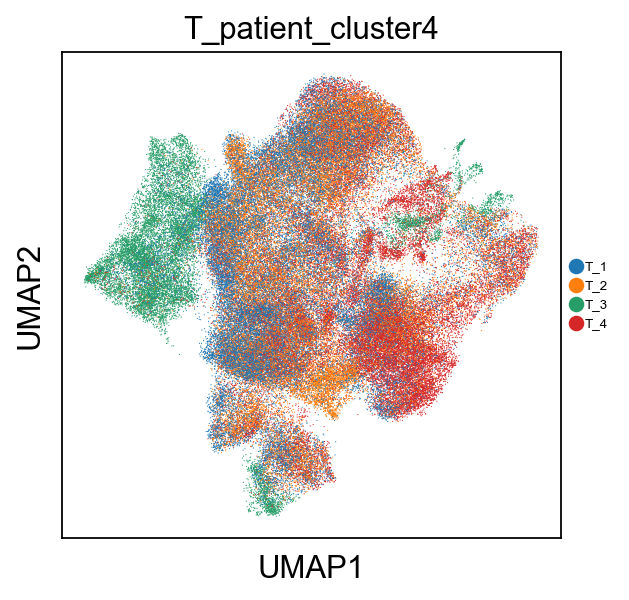

In [26]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'T_1': ['P010','P008','P021','P049','P020','P062','P032','P016','P061','P012',
                     'P057','P015','P065','P063','P130','P056', 'P011','P127','P126','P001',
                     'P028','P027','P030'],
             'T_2': ['P037','P031','P026','P042','P019','P017','P036','P054','P023','P128',
                     'P048','P002','P104','P087','P094','P084','P079','P107','P076','P089',
                     'P083'],
                     
                   
             'T_3': [ 'P986','P658','P836','P866','P846','P686','P865','P585','P944','P787'],
             'T_4': ['P052','P024','P040','P039','P080','P075','P091','P009B','P082','P022',
                     'P074','P047','P038','P044','P009A']
              }

# Initialize empty column in cell metadata
adata_T.obs['T_patient_cluster'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_T.obs.patient).isin(cell_dict[i])
    adata_T.obs.loc[ind,'T_patient_cluster4'] = i

sc.pl.umap(adata_T, color=['T_patient_cluster4'], legend_loc='right margin', legend_fontsize=6, save='umap_Tcell_patient_cluster4.pdf')


In [27]:
df = pd.crosstab(adata_T.obs['patient'], adata_T.obs['T_patient_cluster4'])
df.to_csv('Tcluster_patient.csv')

In [25]:
df = pd.crosstab(adata_T.obs['patient'], adata_T.obs['patient'])
df.to_csv('Tpatient.csv')

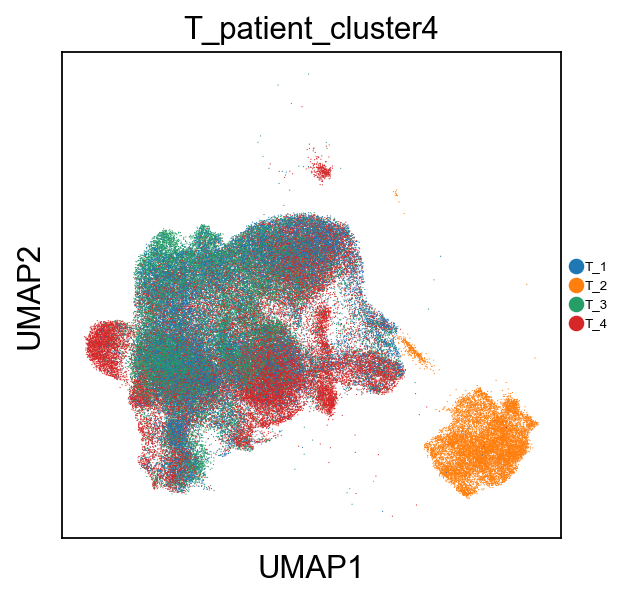

In [27]:
# previous one
# Fill in the clusters that belong to each cell type based on each marker in the plot above
#cell_dict = {'T_1': ['P010','P008','P021','P019','P017','P054','P036','P023','P032','P016','P104','P087','P094',
#                          'P084','P079','P107','P076','P089','P083'],
#             'T_2': [ 'P986','P051','P181','P944','P787','P686','P658','P846','P585','P866'],
#             'T_3': ['P049','P020','P062','P062','P130','P061','P012','P057','P015','P065','P063','P056','P030',
#                          'P128','P048','P002','P127','P126','P001','P028','P027'],
#             'T_4': ['P037','P031','P026','P042','P040','P039','P011','P080','P075','P091',
#                    'P009B','P052','P024','P082','P022','P074','P047','P038','P044','P009A']
#              }

# Initialize empty column in cell metadata
#adata_T.obs['T_patient_cluster'] = np.nan

# Generate new assignments
#for i in cell_dict.keys():
#    ind = pd.Series(adata_T.obs.patient).isin(cell_dict[i])
#    adata_T.obs.loc[ind,'T_patient_cluster4'] = i

#sc.pl.umap(adata_T, color=['T_patient_cluster4'], legend_loc='right margin', legend_fontsize=6, save='umap_Tcell_patient_cluster4.pdf')


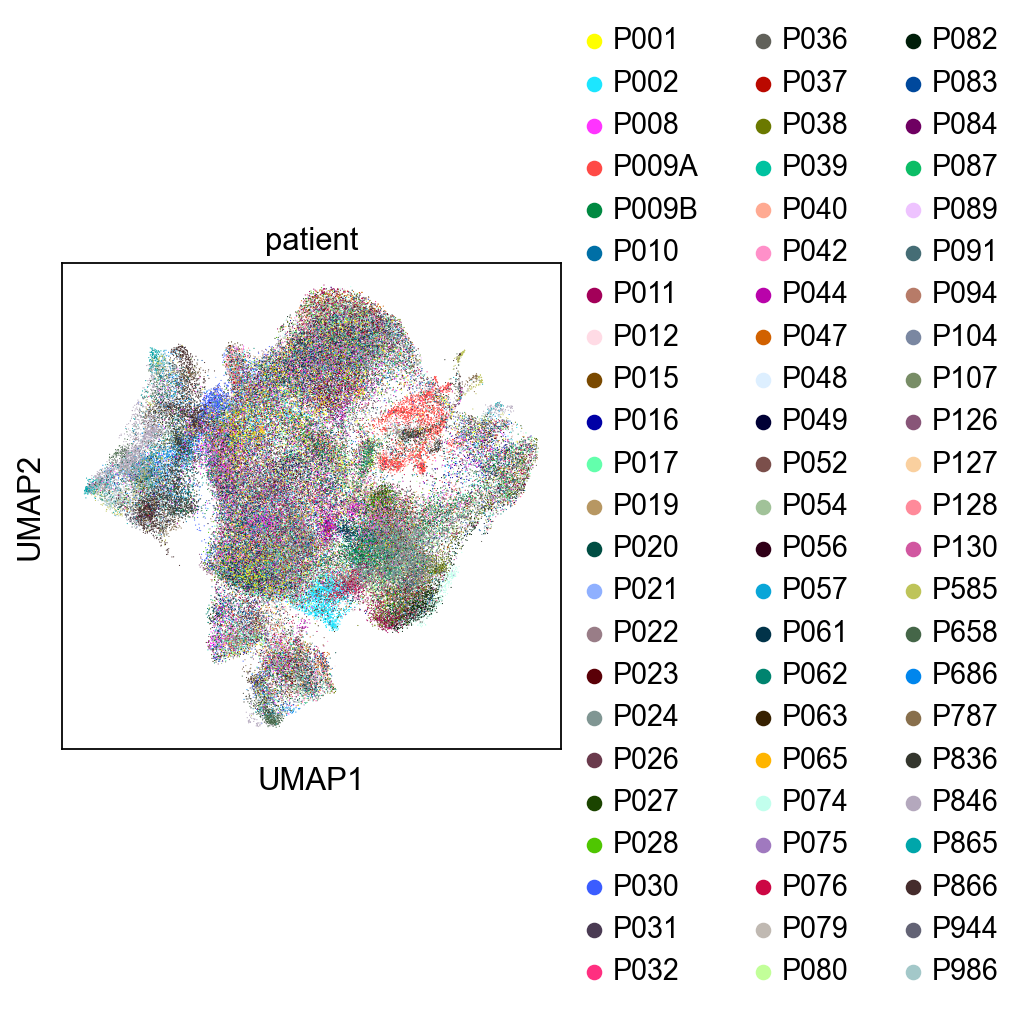

In [28]:
sc.pl.umap(adata_T, color=['patient'], save='T_cell_Group_ABC_patient_immune-modified.pdf')

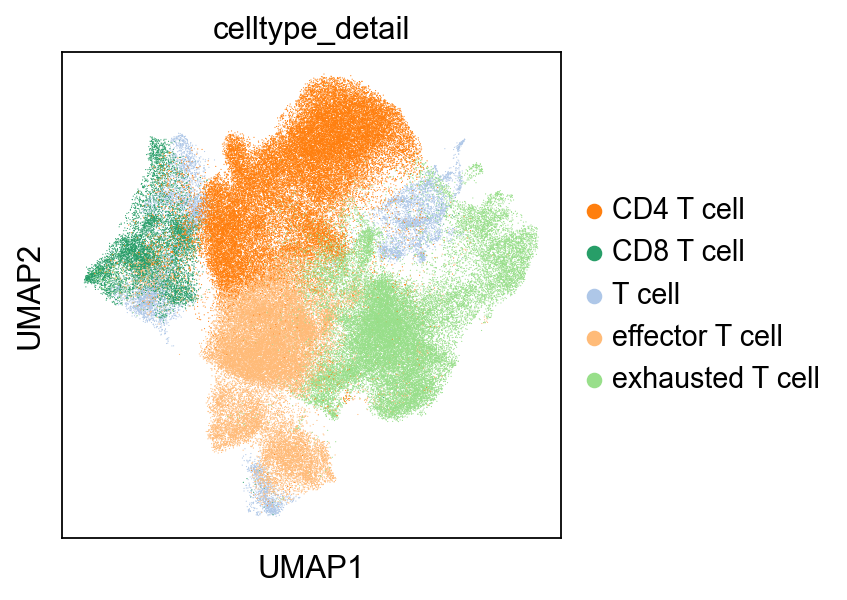

In [29]:
sc.pl.umap(adata_T, color=['celltype_detail'], save='_T_cell_by_celltype_detail.pdf')

In [23]:
#sc.pl.umap(adata, color=['patient'], save='umap_Group_A_patient_immune.pdf')

In [30]:
adata_T.obs

n_genes  n_genes_by_counts  total_counts  \
AAACCTGAGTAGCCGA-1-0-0    3934.0               3879   1452.073242   
AAACCTGCAAGAGGCT-1-0-0     674.0                669    882.995728   
AAACCTGCAGTATCTG-1-0-0    1014.0               1003    956.411804   
AAACCTGGTGCCTGGT-1-0-0     896.0                885   1091.559448   
AAACCTGGTGCGCTTG-1-0-0     786.0                772    876.556519   
...                          ...                ...           ...   
TTTGGTTAGCAAATCA-1-24-2   1375.0               1351   1476.700806   
TTTGGTTAGTGGTAAT-1-24-2   1606.0               1573   1480.355835   
TTTGGTTCAAGCCATT-1-24-2   4456.0               4328   1867.209229   
TTTGTCAGTCCTCTTG-1-24-2   2711.0               2644   1972.602417   
TTTGTCAGTCTCTTTA-1-24-2   1890.0               1858   1673.672119   

                         total_counts_mt  pct_counts_mt tissue patient leiden  \
AAACCTGAGTAGCCGA-1-0-0         18.802568       1.294877  tumor    P686      6   
AAACCTGCAAGAGGCT-1-0-0         11.229170       1.271713  tumor    P686      6   
AAACCTGCAGTATCTG-1-0-0         18.788149       1.964441  tumor    P686      6   
AAACCTGGTGCCTGGT-1-0-0         17.238060       1.579214  tumor    P686      6   
AAACCTGGTGCGCTTG-1-0-0         18.123993       2.067635  tumor    P686      6   
...                                  ...            ...    ...     ...    ...   
TTTGGTTAGCAAATCA-1-24-2        22.369625       1.514838  tumor    P001      1   
TTTGGTTAGTGGTAAT-1-24-2        29.242380       1.975362  tumor    P001      4   
TTTGGTTCAAGCCATT-1-24-2        29.546848       1.582407  tumor    P001      0   
TTTGTCAGTCCTCTTG-1-24-2        24.433256       1.238631  tumor    P001     10   
TTTGTCAGTCTCTTTA-1-24-2         7.590561       0.453527  tumor    P001      4   

                        batch  total_counts_ribo  ...  pct_counts_hb  \
AAACCTGAGTAGCCGA-1-0-0      0         198.197769  ...       0.000000   
AAACCTGCAAGAGGCT-1-0-0      0         213.666718  ...       0.000000   
AAACCTGCAGTATCTG-1-0-0      0         221.148575  ...       0.000000   
AAACCTGGTGCCTGGT-1-0-0      0         176.360626  ...       0.000000   
AAACCTGGTGCGCTTG-1-0-0      0         217.813019  ...       0.000000   
...                       ...                ...  ...            ...   
TTTGGTTAGCAAATCA-1-24-2     2         184.743835  ...       0.000000   
TTTGGTTAGTGGTAAT-1-24-2     2         188.684555  ...       0.043961   
TTTGGTTCAAGCCATT-1-24-2     2         172.502136  ...       0.009242   
TTTGTCAGTCCTCTTG-1-24-2     2         120.637726  ...       0.000000   
TTTGTCAGTCTCTTTA-1-24-2     2         163.753265  ...       0.000000   

                         percent_mt2     n_counts  celltype   crude  \
AAACCTGAGTAGCCGA-1-0-0      0.012949  1452.073242         6  T cell   
AAACCTGCAAGAGGCT-1-0-0      0.012717   882.995728         6  T cell   
AAACCTGCAGTATCTG-1-0-0      0.019644   956.411804         6  T cell   
AAACCTGGTGCCTGGT-1-0-0      0.015792  1091.559448         6  T cell   
AAACCTGGTGCGCTTG-1-0-0      0.020676   876.556519         6  T cell   
...                              ...          ...       ...     ...   
TTTGGTTAGCAAATCA-1-24-2     0.015148  1476.700806         1  T cell   
TTTGGTTAGTGGTAAT-1-24-2     0.019754  1480.355835         4  T cell   
TTTGGTTCAAGCCATT-1-24-2     0.015824  1867.209229         0  T cell   
TTTGTCAGTCCTCTTG-1-24-2     0.012386  1972.602417        10  T cell   
TTTGTCAGTCTCTTTA-1-24-2     0.004535  1673.672119         4  T cell   

                          celltype_detail patient_cluster        dataset  \
AAACCTGAGTAGCCGA-1-0-0         CD8 T cell         Group A   Dinh dataset   
AAACCTGCAAGAGGCT-1-0-0         CD8 T cell         Group A   Dinh dataset   
AAACCTGCAGTATCTG-1-0-0         CD8 T cell         Group A   Dinh dataset   
AAACCTGGTGCCTGGT-1-0-0         CD8 T cell         Group A   Dinh dataset   
AAACCTGGTGCGCTTG-1-0-0         CD8 T cell         Group A   Dinh dataset   
...                                   ...        

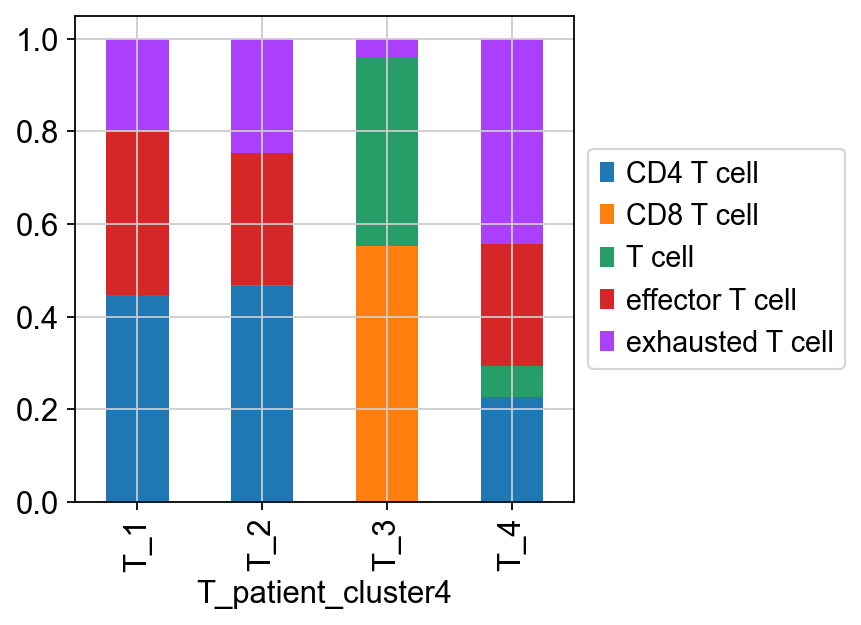

In [31]:
tmp = pd.crosstab(adata_T.obs['T_patient_cluster4'],adata_T.obs['celltype_detail'], normalize='index')
ax = tmp.plot.bar(stacked=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)).get_figure()

ax.savefig('t_cell_stacked_bar.pdf')

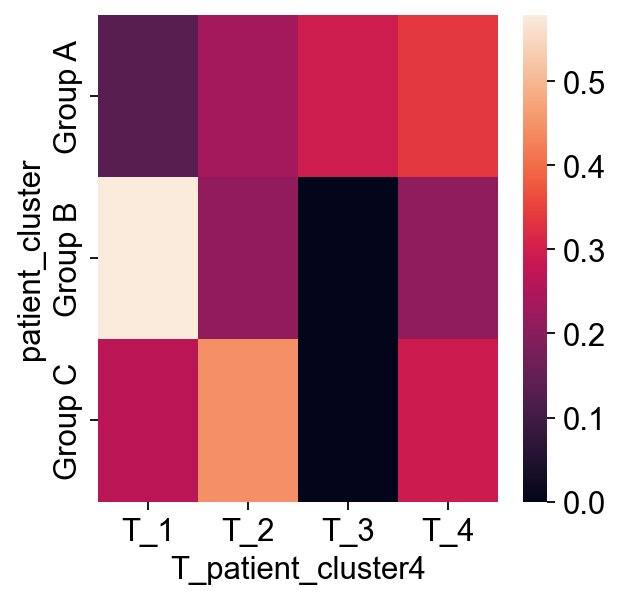

In [32]:
svm = sns.heatmap(pd.crosstab(adata_T.obs["patient_cluster"], adata_T.obs["T_patient_cluster4"], normalize="index"))
svm.figure.savefig('heatmap_tumor_group_to_T_cell.pdf', dpi=400)

In [33]:
adata_T.write('T_cell_from_Group_ABC_patients_immune_after_harmony.h5ad')

In [7]:
adata_T = sc.read('T_cell_from_Group_ABC_patients_immune_after_harmony.h5ad')

In [35]:
adata_T.obs

n_genes  n_genes_by_counts  total_counts  \
AAACCTGAGTAGCCGA-1-0-0    3934.0               3879   1452.073242   
AAACCTGCAAGAGGCT-1-0-0     674.0                669    882.995728   
AAACCTGCAGTATCTG-1-0-0    1014.0               1003    956.411804   
AAACCTGGTGCCTGGT-1-0-0     896.0                885   1091.559448   
AAACCTGGTGCGCTTG-1-0-0     786.0                772    876.556519   
...                          ...                ...           ...   
TTTGGTTAGCAAATCA-1-24-2   1375.0               1351   1476.700806   
TTTGGTTAGTGGTAAT-1-24-2   1606.0               1573   1480.355835   
TTTGGTTCAAGCCATT-1-24-2   4456.0               4328   1867.209229   
TTTGTCAGTCCTCTTG-1-24-2   2711.0               2644   1972.602417   
TTTGTCAGTCTCTTTA-1-24-2   1890.0               1858   1673.672119   

                         total_counts_mt  pct_counts_mt tissue patient leiden  \
AAACCTGAGTAGCCGA-1-0-0         18.802568       1.294877  tumor    P686      6   
AAACCTGCAAGAGGCT-1-0-0         11.229170       1.271713  tumor    P686      6   
AAACCTGCAGTATCTG-1-0-0         18.788149       1.964441  tumor    P686      6   
AAACCTGGTGCCTGGT-1-0-0         17.238060       1.579214  tumor    P686      6   
AAACCTGGTGCGCTTG-1-0-0         18.123993       2.067635  tumor    P686      6   
...                                  ...            ...    ...     ...    ...   
TTTGGTTAGCAAATCA-1-24-2        22.369625       1.514838  tumor    P001      1   
TTTGGTTAGTGGTAAT-1-24-2        29.242380       1.975362  tumor    P001      4   
TTTGGTTCAAGCCATT-1-24-2        29.546848       1.582407  tumor    P001      0   
TTTGTCAGTCCTCTTG-1-24-2        24.433256       1.238631  tumor    P001     10   
TTTGTCAGTCTCTTTA-1-24-2         7.590561       0.453527  tumor    P001      4   

                        batch  total_counts_ribo  ...  pct_counts_hb  \
AAACCTGAGTAGCCGA-1-0-0      0         198.197769  ...       0.000000   
AAACCTGCAAGAGGCT-1-0-0      0         213.666718  ...       0.000000   
AAACCTGCAGTATCTG-1-0-0      0         221.148575  ...       0.000000   
AAACCTGGTGCCTGGT-1-0-0      0         176.360626  ...       0.000000   
AAACCTGGTGCGCTTG-1-0-0      0         217.813019  ...       0.000000   
...                       ...                ...  ...            ...   
TTTGGTTAGCAAATCA-1-24-2     2         184.743835  ...       0.000000   
TTTGGTTAGTGGTAAT-1-24-2     2         188.684555  ...       0.043961   
TTTGGTTCAAGCCATT-1-24-2     2         172.502136  ...       0.009242   
TTTGTCAGTCCTCTTG-1-24-2     2         120.637726  ...       0.000000   
TTTGTCAGTCTCTTTA-1-24-2     2         163.753265  ...       0.000000   

                         percent_mt2     n_counts  celltype   crude  \
AAACCTGAGTAGCCGA-1-0-0      0.012949  1452.073242         6  T cell   
AAACCTGCAAGAGGCT-1-0-0      0.012717   882.995728         6  T cell   
AAACCTGCAGTATCTG-1-0-0      0.019644   956.411804         6  T cell   
AAACCTGGTGCCTGGT-1-0-0      0.015792  1091.559448         6  T cell   
AAACCTGGTGCGCTTG-1-0-0      0.020676   876.556519         6  T cell   
...                              ...          ...       ...     ...   
TTTGGTTAGCAAATCA-1-24-2     0.015148  1476.700806         1  T cell   
TTTGGTTAGTGGTAAT-1-24-2     0.019754  1480.355835         4  T cell   
TTTGGTTCAAGCCATT-1-24-2     0.015824  1867.209229         0  T cell   
TTTGTCAGTCCTCTTG-1-24-2     0.012386  1972.602417        10  T cell   
TTTGTCAGTCTCTTTA-1-24-2     0.004535  1673.672119         4  T cell   

                          celltype_detail patient_cluster        dataset  \
AAACCTGAGTAGCCGA-1-0-0         CD8 T cell         Group A   Dinh dataset   
AAACCTGCAAGAGGCT-1-0-0         CD8 T cell         Group A   Dinh dataset   
AAACCTGCAGTATCTG-1-0-0         CD8 T cell         Group A   Dinh dataset   
AAACCTGGTGCCTGGT-1-0-0         CD8 T cell         Group A   Dinh dataset   
AAACCTGGTGCGCTTG-1-0-0         CD8 T cell         Group A   Dinh dataset   
...                                   ...        

In [36]:
# loading data made from 3 T cell classes and 3 Myeloid cell classes
#adata = sc.read('F:/Ko/67ESCC_PCN_integration_07-19-22/immune_cell/GroupABC_integrated/T_cell_from_Group_ABC_patients_immune_after_harmony.h5ad')

In [37]:
df = pd.DataFrame(adata_T.obs)
df

n_genes  n_genes_by_counts  total_counts  \
AAACCTGAGTAGCCGA-1-0-0    3934.0               3879   1452.073242   
AAACCTGCAAGAGGCT-1-0-0     674.0                669    882.995728   
AAACCTGCAGTATCTG-1-0-0    1014.0               1003    956.411804   
AAACCTGGTGCCTGGT-1-0-0     896.0                885   1091.559448   
AAACCTGGTGCGCTTG-1-0-0     786.0                772    876.556519   
...                          ...                ...           ...   
TTTGGTTAGCAAATCA-1-24-2   1375.0               1351   1476.700806   
TTTGGTTAGTGGTAAT-1-24-2   1606.0               1573   1480.355835   
TTTGGTTCAAGCCATT-1-24-2   4456.0               4328   1867.209229   
TTTGTCAGTCCTCTTG-1-24-2   2711.0               2644   1972.602417   
TTTGTCAGTCTCTTTA-1-24-2   1890.0               1858   1673.672119   

                         total_counts_mt  pct_counts_mt tissue patient leiden  \
AAACCTGAGTAGCCGA-1-0-0         18.802568       1.294877  tumor    P686      6   
AAACCTGCAAGAGGCT-1-0-0         11.229170       1.271713  tumor    P686      6   
AAACCTGCAGTATCTG-1-0-0         18.788149       1.964441  tumor    P686      6   
AAACCTGGTGCCTGGT-1-0-0         17.238060       1.579214  tumor    P686      6   
AAACCTGGTGCGCTTG-1-0-0         18.123993       2.067635  tumor    P686      6   
...                                  ...            ...    ...     ...    ...   
TTTGGTTAGCAAATCA-1-24-2        22.369625       1.514838  tumor    P001      1   
TTTGGTTAGTGGTAAT-1-24-2        29.242380       1.975362  tumor    P001      4   
TTTGGTTCAAGCCATT-1-24-2        29.546848       1.582407  tumor    P001      0   
TTTGTCAGTCCTCTTG-1-24-2        24.433256       1.238631  tumor    P001     10   
TTTGTCAGTCTCTTTA-1-24-2         7.590561       0.453527  tumor    P001      4   

                        batch  total_counts_ribo  ...  pct_counts_hb  \
AAACCTGAGTAGCCGA-1-0-0      0         198.197769  ...       0.000000   
AAACCTGCAAGAGGCT-1-0-0      0         213.666718  ...       0.000000   
AAACCTGCAGTATCTG-1-0-0      0         221.148575  ...       0.000000   
AAACCTGGTGCCTGGT-1-0-0      0         176.360626  ...       0.000000   
AAACCTGGTGCGCTTG-1-0-0      0         217.813019  ...       0.000000   
...                       ...                ...  ...            ...   
TTTGGTTAGCAAATCA-1-24-2     2         184.743835  ...       0.000000   
TTTGGTTAGTGGTAAT-1-24-2     2         188.684555  ...       0.043961   
TTTGGTTCAAGCCATT-1-24-2     2         172.502136  ...       0.009242   
TTTGTCAGTCCTCTTG-1-24-2     2         120.637726  ...       0.000000   
TTTGTCAGTCTCTTTA-1-24-2     2         163.753265  ...       0.000000   

                         percent_mt2     n_counts  celltype   crude  \
AAACCTGAGTAGCCGA-1-0-0      0.012949  1452.073242         6  T cell   
AAACCTGCAAGAGGCT-1-0-0      0.012717   882.995728         6  T cell   
AAACCTGCAGTATCTG-1-0-0      0.019644   956.411804         6  T cell   
AAACCTGGTGCCTGGT-1-0-0      0.015792  1091.559448         6  T cell   
AAACCTGGTGCGCTTG-1-0-0      0.020676   876.556519         6  T cell   
...                              ...          ...       ...     ...   
TTTGGTTAGCAAATCA-1-24-2     0.015148  1476.700806         1  T cell   
TTTGGTTAGTGGTAAT-1-24-2     0.019754  1480.355835         4  T cell   
TTTGGTTCAAGCCATT-1-24-2     0.015824  1867.209229         0  T cell   
TTTGTCAGTCCTCTTG-1-24-2     0.012386  1972.602417        10  T cell   
TTTGTCAGTCTCTTTA-1-24-2     0.004535  1673.672119         4  T cell   

                          celltype_detail patient_cluster        dataset  \
AAACCTGAGTAGCCGA-1-0-0         CD8 T cell         Group A   Dinh dataset   
AAACCTGCAAGAGGCT-1-0-0         CD8 T cell         Group A   Dinh dataset   
AAACCTGCAGTATCTG-1-0-0         CD8 T cell         Group A   Dinh dataset   
AAACCTGGTGCCTGGT-1-0-0         CD8 T cell         Group A   Dinh dataset   
AAACCTGGTGCGCTTG-1-0-0         CD8 T cell         Group A   Dinh dataset   
...                                   ...        

In [38]:
print (df.dtypes)

n_genes                float64
n_genes_by_counts        int32
total_counts           float32
total_counts_mt        float32
pct_counts_mt          float32
tissue                category
patient               category
leiden                category
batch                 category
total_counts_ribo      float32
pct_counts_ribo        float32
total_counts_hb        float32
pct_counts_hb          float32
percent_mt2            float32
n_counts               float32
celltype              category
crude                 category
celltype_detail       category
patient_cluster       category
dataset               category
T_patient_cluster      float64
T_patient_cluster4    category
dtype: object


In [39]:
df['patient'] = df['patient'].astype(object)
df['crude'] = df['crude'].astype(object)
df['leiden'] = df['leiden'].astype(object)
df['patient_cluster'] = df['patient_cluster'].astype(object)
df['T_patient_cluster'] = df['T_patient_cluster'].astype(object)
df['T_patient_cluster4'] = df['T_patient_cluster4'].astype(object)
df['celltype'] = df['celltype'].astype(object)
df['batch'] = df['batch'].astype(object)


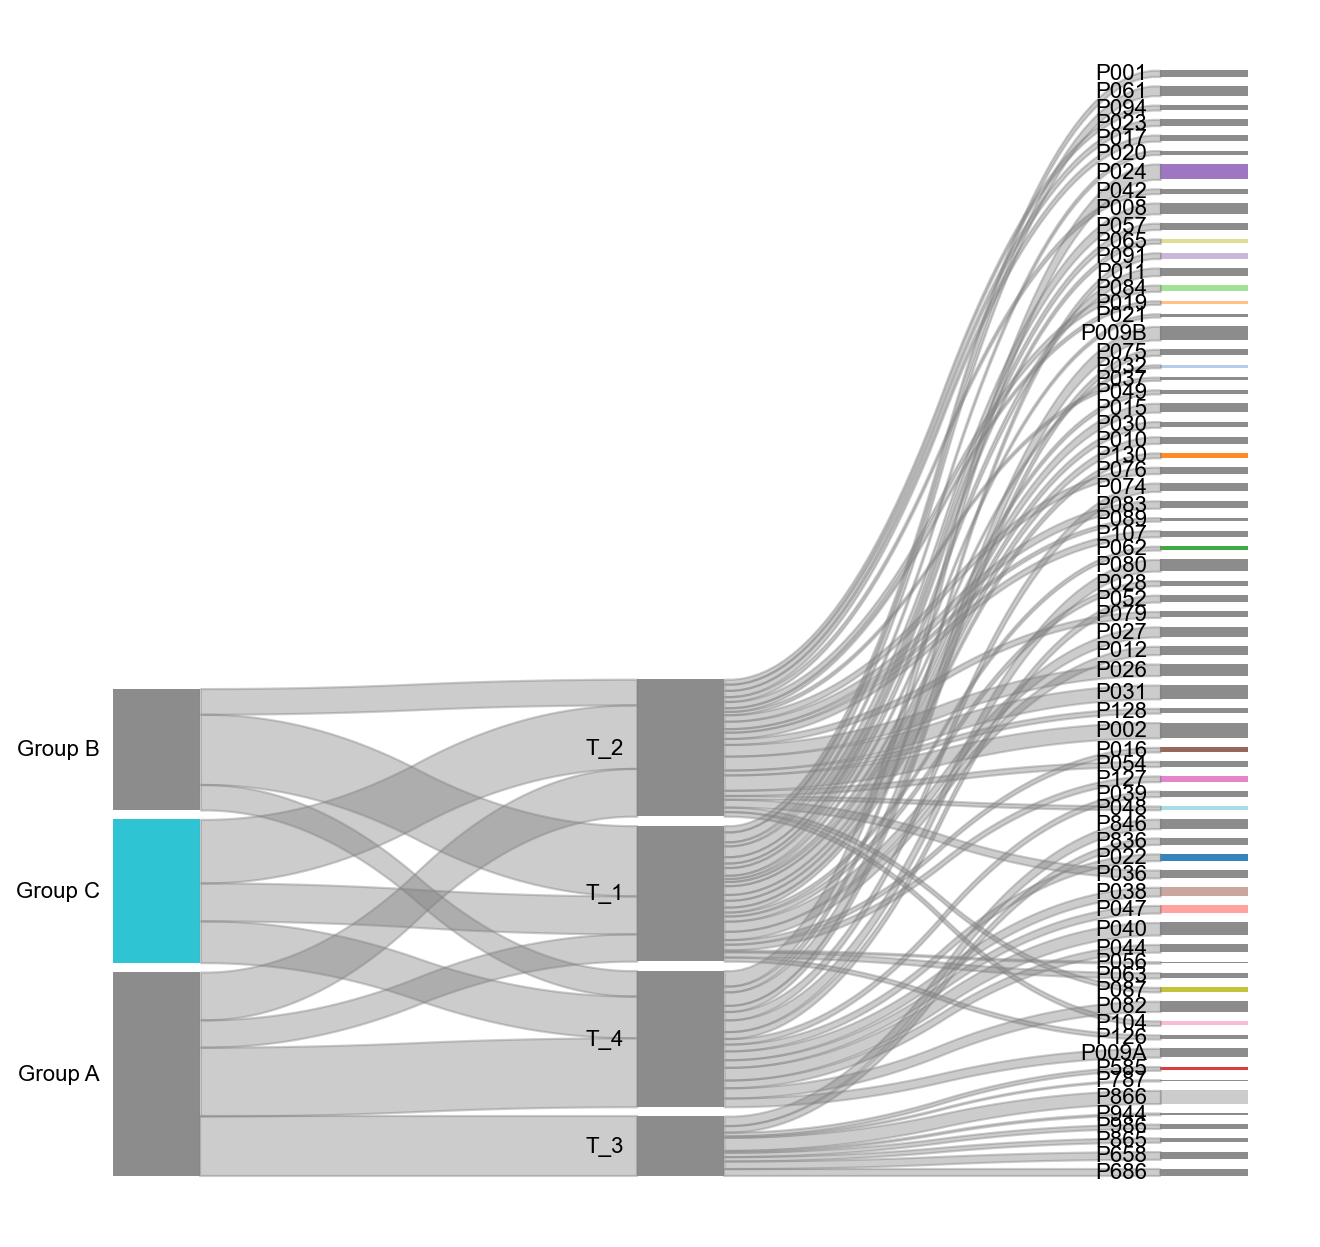

In [40]:
#pySnakey2 package
# for multilayer dataframe
import matplotlib.pyplot as plt
import pandas as pd
from pysankey2.datasets import load_fruits
from pysankey2.utils import setColorConf
from pysankey2 import Sankey

df_1 = df[['patient_cluster','T_patient_cluster4','patient']]
sky_auto_global_colors = Sankey(df_1,colorMode="global")#,stripColor='left')
fig,ax = sky_auto_global_colors.plot()

# Get current figure
fig = plt.gcf()

# Set size in inches
fig.set_size_inches(10, 10)

# Set the color of the background to white
fig.set_facecolor("w")

# Save the figure
fig.savefig("T_group_tumor_group_comparison.pdf", bbox_inches="tight", dpi=300)

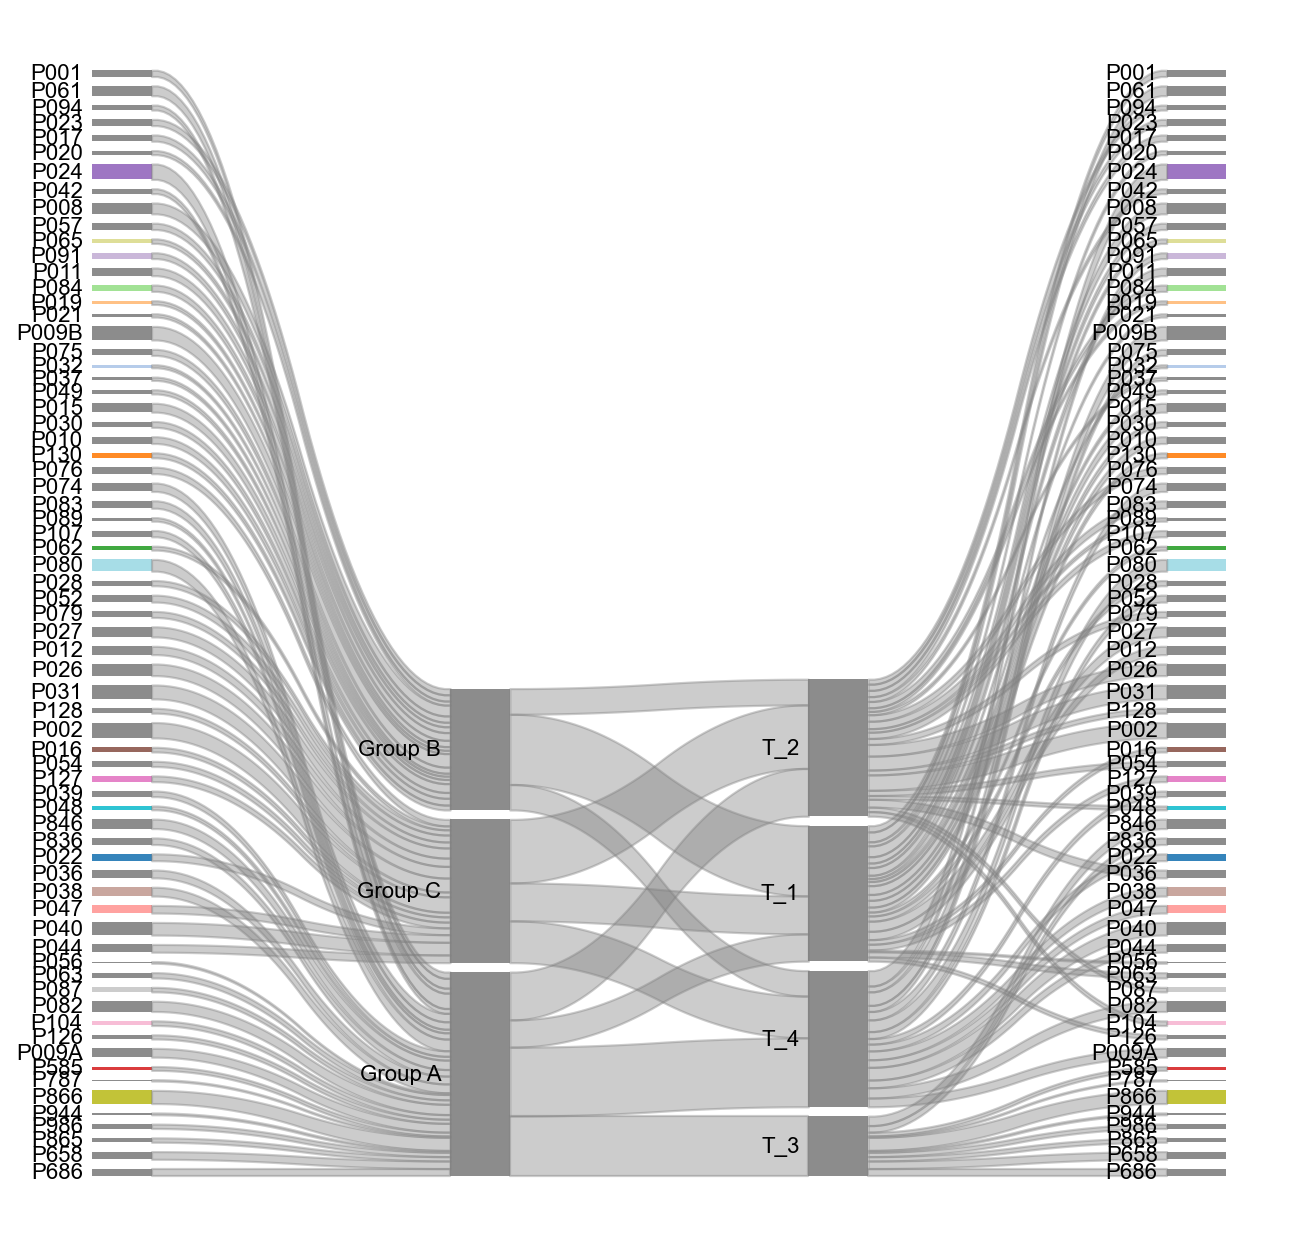

In [41]:
df_1 = df[['patient','patient_cluster','T_patient_cluster4','patient']]
sky_auto_global_colors = Sankey(df_1,colorMode="global")#,stripColor='left')
fig,ax = sky_auto_global_colors.plot()

# Get current figure
fig = plt.gcf()

# Set size in inches
fig.set_size_inches(10, 10)

# Set the color of the background to white
fig.set_facecolor("w")

# Save the figure
fig.savefig("T_group_tumor_group_comparison_1.pdf", bbox_inches="tight", dpi=300)

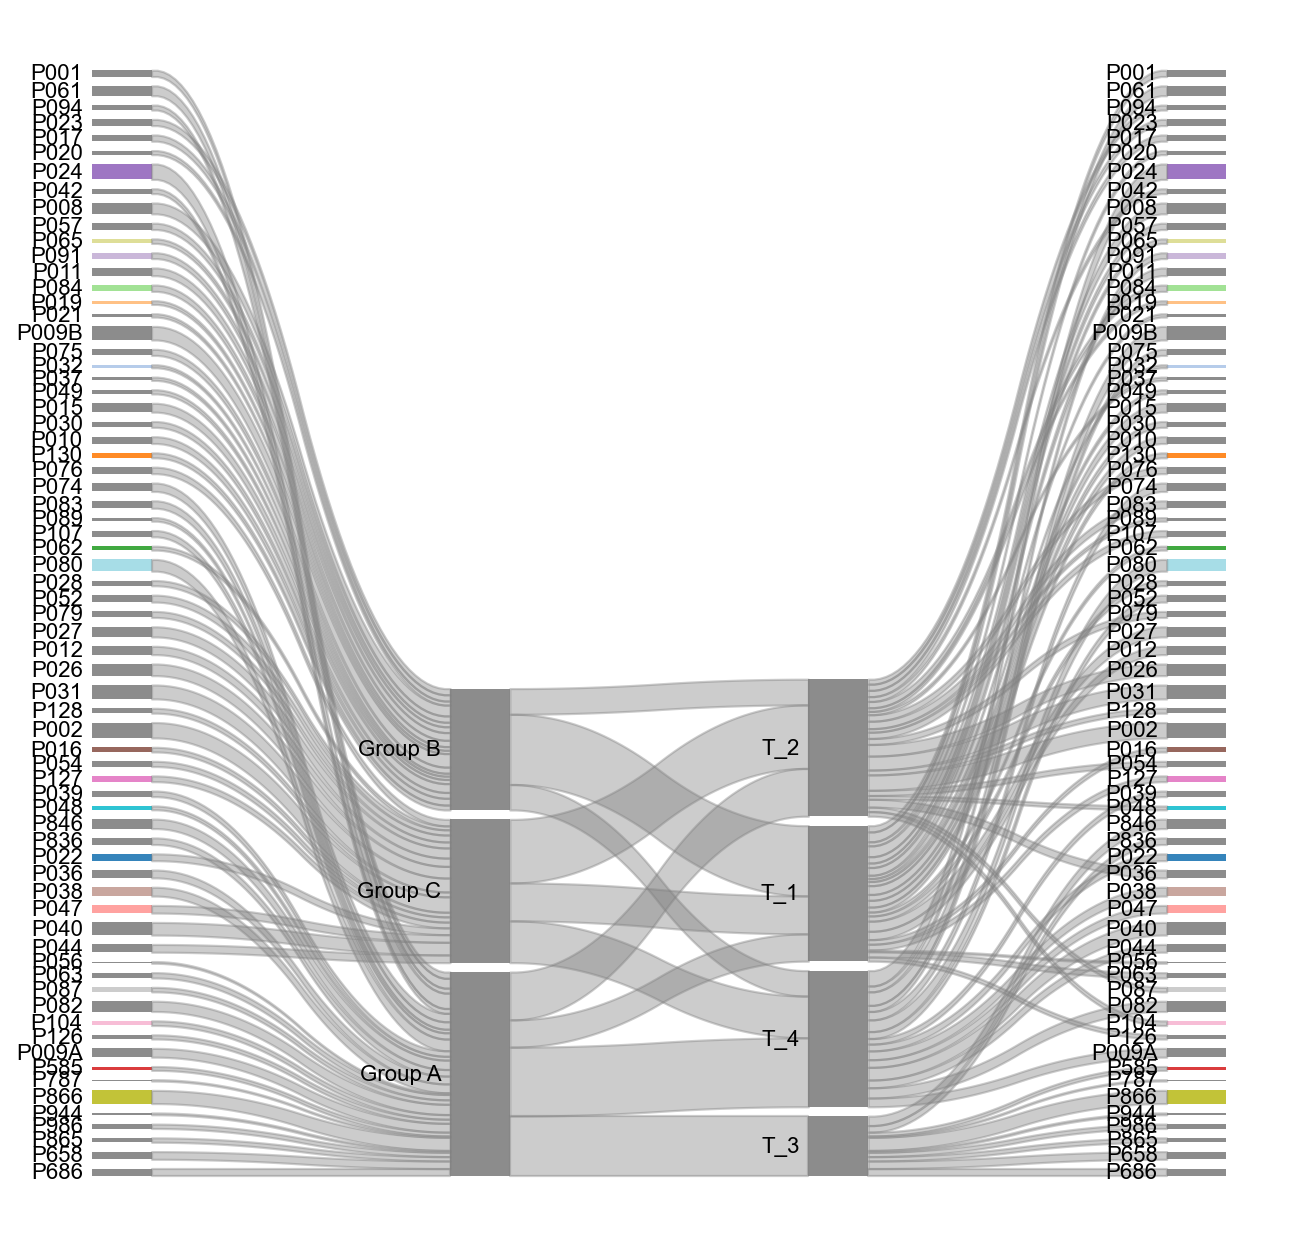

In [42]:
df_1 = df[['patient','patient_cluster','T_patient_cluster4','patient']]
sky_auto_global_colors = Sankey(df_1,colorMode="global")#,stripColor='left')
fig,ax = sky_auto_global_colors.plot()

# Get current figure
fig = plt.gcf()

# Set size in inches
fig.set_size_inches(10, 10)

# Set the color of the background to white
fig.set_facecolor("w")

# Save the figure
fig.savefig("T_group_tumor_group_comparison_1.pdf", bbox_inches="tight", dpi=300)

# after M-T classification done

In [8]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'M1toT1': ["P011",	"P016",	"P032",	"P056",	"P063",],
             'M1toT2': ["P036",	"P037",	"P083",	"P087",	"P089",	"P104",],
             'M1toT3': [],
             'M1toT4': ["P009B",	"P022",	"P038",	"P047",	"P052",	"P074",	"P075",	"P082",	"P091",],
             'M2toT1': ["P010",	"P130",],
             'M2toT2': [],
             'M2toT3': ["P585",	"P658",	"P686",	"P787",	"P836",	"P846",	"P865",	"P866",	"P944",	"P986",],
             'M2toT4': [],
             'M3toT1': ["P001",	"P008",	"P015",	"P021",	"P027",	"P049",	"P057",	"P061",	"P062",	"P065",],
             'M3toT2': ["P002",	"P017",	"P023",	"P026",	"P031",	"P042",	"P048",	"P076",	"P079",	"P084",	"P094",	"P107",],
             'M3toT3': [],
             'M3toT4': ["P024",	"P040",	"P044",	"P080",],
             'M4toT1': ["P012",	"P020",	"P028",	"P030",	"P126",	"P127",],
             'M4toT2': ["P019",	"P054",	"P128",],
             'M4toT3': [],
             'M4toT4': ["P039",],
             'NoMtoT4': ["P009A",]
            }

# Initialize empty column in cell metadata
adata_T.obs['Myeloid_to_T_cluster44'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_T.obs.patient).isin(cell_dict[i])
    adata_T.obs.loc[ind,'Myeloid_to_T_cluster44'] = i

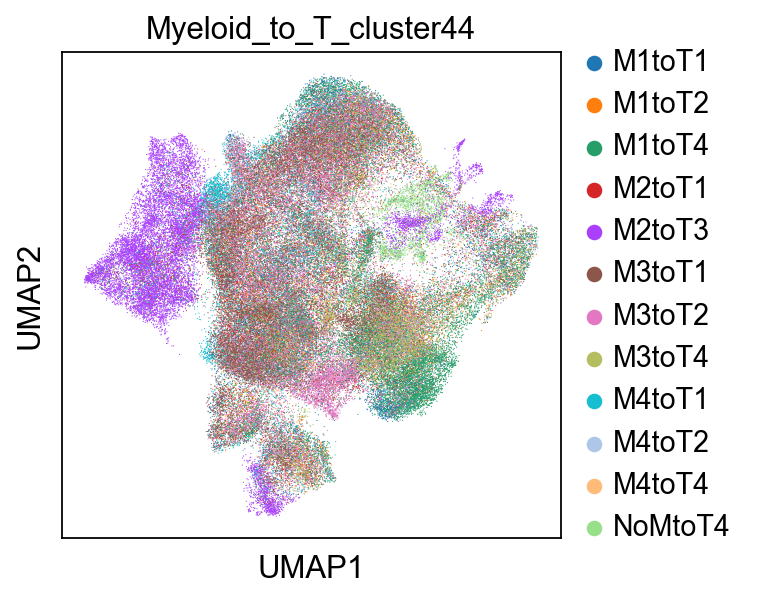

In [9]:
sc.pl.umap(adata_T, color=['Myeloid_to_T_cluster44'], save='_T_cell_by_Myeloid_to_T_cluster44.pdf')

In [10]:
adata_T.write('T_cell_from_Group_ABC_patients_immune_after_harmony.h5ad')